In [3]:
import pandas as pd
import numpy as np

In [4]:
import sys
print(sys.version)
print("pandas version", pd.__version__)

3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
pandas version 1.4.4


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mexwell/long-distance-running-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/tenzingpalden/.cache/kagglehub/datasets/mexwell/long-distance-running-dataset/versions/1


In [6]:
import glob
file_names = glob.glob(path + "/run_ww_2019_*.csv")

In [7]:
combined_df = pd.concat([pd.read_csv(file) for file in file_names], ignore_index=True)

In [8]:
combined_df.shape

(15766396, 9)

In [9]:
top_3 = combined_df.groupby("country")[["distance", "duration"]].max().sort_values(by="distance", ascending=False)
top_3

,distance,duration
country,,
United States,4308.245,37197.983333
Canada,4078.716,29650.983333
Taiwan,2720.067,21437.866667
Hungary,2332.217,11500.150000
Belgium,2314.319,8979.150000
...,...,...
Laos,182.699,1096.166667
Mongolia,173.839,1054.533333
Cape Verde,125.220,824.933333


In [10]:
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("ggplot")

In [11]:
dfa= combined_df[['datetime', 'athlete', 'distance', 'duration', 'gender', 'age_group', 'country', 'major']].copy()

In [12]:
dfa.groupby("gender")[["distance","country"]].max().sort_values("distance")

/var/folders/k6/zc2mwyh15sb703_r7s1tw4x80000gn/T/ipykernel_7382/1006885717.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  dfa.groupby("gender")[["distance","country"]].max().sort_values("distance")


,distance
gender,
M,3232.037
F,4308.245


In [13]:
result = dfa.loc[dfa.groupby("gender")["distance"].idxmax()].sort_values("distance")

In [14]:
dfa.dtypes

datetime      object
athlete        int64
distance     float64
duration     float64
gender        object
age_group     object
country       object
major         object
dtype: object

In [15]:
dfa["country"] = dfa["country"].fillna("nocountry")

In [16]:
dfa["country"].isna().sum()

0

In [17]:
dfa.tail()

,datetime,athlete,distance,duration,gender,age_group,country,major
15766391,2019-12-31,37594,146.349677,695.112903,M,18 - 34,United Kingdom,BERLIN 2017
15766392,2019-12-31,37595,587.602258,2437.435484,M,18 - 34,United States,"BERLIN 2019,NEW YORK 2015"
15766393,2019-12-31,37596,161.051613,680.467742,M,18 - 34,United States,BOSTON 2017
15766394,2019-12-31,37597,136.219355,697.370968,F,18 - 34,United States,BOSTON 2015
15766395,2019-12-31,37598,297.745161,2378.951613,M,35 - 54,China,TOKYO 2012


Text(0, 0.5, 'Duration in Minutes')

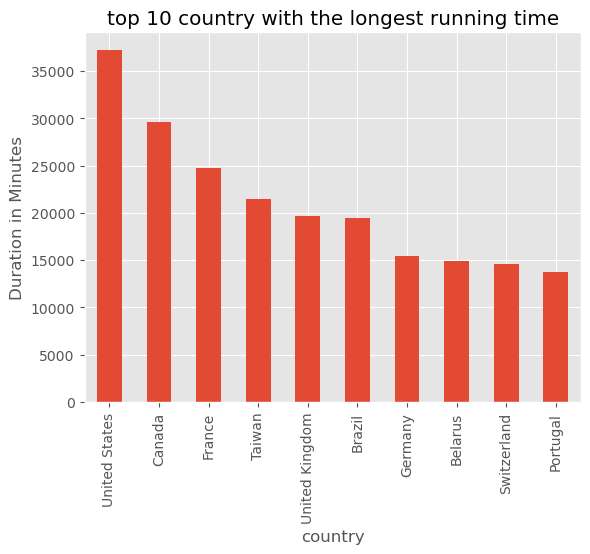

In [18]:
ax = dfa.groupby("country")["duration"].max().round(2).sort_values(ascending=False).head(10) \
    .plot(kind="bar",
          title= "top 10 country with the longest running time")
ax.set_xlabel("country")
ax.set_ylabel("Duration in Minutes")

Text(0, 0.5, 'Distance in Kilometers')

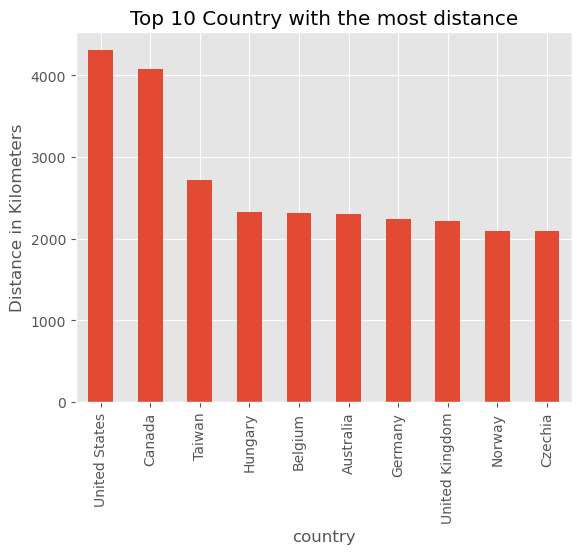

In [19]:
ax= dfa.groupby("country")["distance"].max().sort_values(ascending=False).head(10) \
    .plot(kind= "bar",
          title="Top 10 Country with the most distance")

ax.set_xlabel("country")
ax.set_ylabel("Distance in Kilometers")

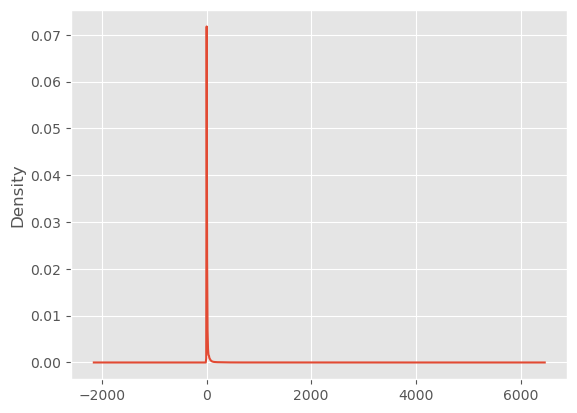

In [25]:
ax= dfa["distance"].plot(kind="kde")

In [26]:
dfa.head()

,datetime,athlete,distance,duration,gender,age_group,country,major
0,2019-03-31,0,0.000,0.000000,F,18 - 34,United States,CHICAGO 2019
1,2019-03-31,1,718.350,4064.200000,M,35 - 54,Germany,BERLIN 2016
2,2019-03-31,2,630.257,3565.550000,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019"
3,2019-03-31,3,751.930,3428.450000,M,18 - 34,United Kingdom,LONDON 2017
4,2019-03-31,4,225.050,1201.083333,M,35 - 54,United States,BOSTON 2017


<AxesSubplot:xlabel='distance', ylabel='duration'>

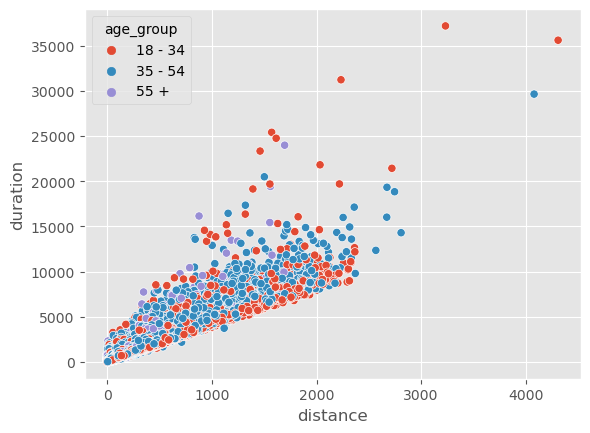

In [34]:
sns.scatterplot(x=dfa["distance"],
    y=dfa["duration"],
    hue=dfa["age_group"]
)